# Plot Image

The `geetools` extention contains a set of functions for reducing `ee.Image` objects by region(s) and rendering charts from the results. The choice of function dictates the arrangement of data in the chart, i.e., what defines x- and y-axis values and what defines the series. Use the following function descriptions and examples to determine the best function and chart type for your purpose.


[![github](https://img.shields.io/badge/-see%20sources-white?logo=github&labelColor=555)](https://github.com/gee-community/geetools/blob/main/docs/usage/plot/plot-image.ipynb)
[![colab](https://img.shields.io/badge/-open%20in%20colab-blue?logo=googlecolab&labelColor=555)](https://colab.research.google.com/github/gee-community/geetools/blob/main/docs/usage/plot/plot-image.ipynb)

In [1]:
import ee, pytest_gee, os

if "EARTHENGINE_SERVICE_ACCOUNT" in os.environ:
    pytest_gee.init_ee_from_service_account()
elif "EARTHENGINE_PROJECT" in os.environ:
    pytest_gee.init_ee_from_token()
else:
    raise ValueError("Cannot authenticate with Earth Engine.")

## Set up environment

Install all the requireed libs if necessary. and perform the import satements upstream.

In [2]:
# uncomment if installation of libs is necessary
# !pip install earthengine-api geetools

In [3]:
from matplotlib import pyplot as plt

import ee
import geetools #noqa: F401

In [4]:
# uncomment if authetication to GEE is needed
# ee.Authenticate()
# ee.Intialize(project="<your_project>")

## Example data

The following examples rely on a `ee.FeatureCollection` composed of three ecoregion features that define regions by which to reduce image data. The Image data are PRISM climate normals, where bands describe climate variables per month; e.g., July precipitation or January mean temperature.


In [5]:
ecoregions = ee.FeatureCollection("projects/google/charts_feature_example").select(["label", "value","warm"])
normClim = ee.ImageCollection('OREGONSTATE/PRISM/Norm91m').toBands()

## Plot by regions

Reduction regions are plotted along the x-axis, labeled by values of a selected feature property. Series are defined by band names whose region reduction results are plotted along the y-axis.

If you want to use another plotting library, you can use the `byRegions` function to get the data and plot it with your favorite library.


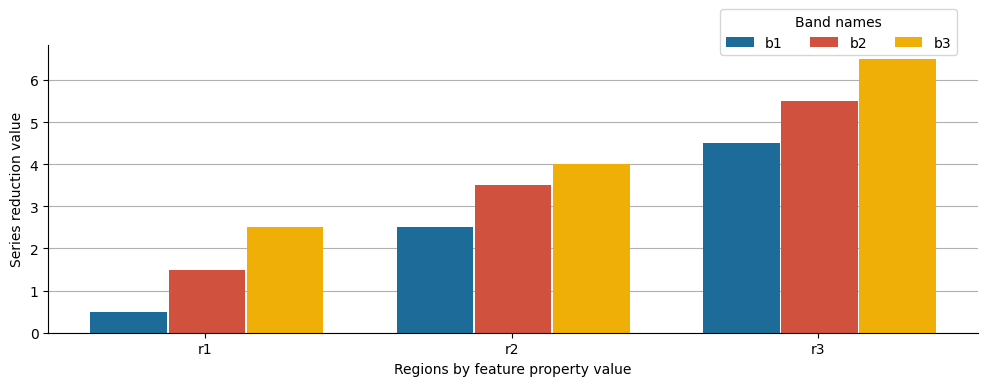

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
features = ['r1', 'r2', 'r3']
p1_values = [0.5, 2.5, 4.5]
p2_values = [1.5, 3.5, 5.5]
p3_values = [2.5, 4.0, 6.5]

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(features))
offset = 0.005

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the bars
rects1 = ax.bar(index, p1_values, bar_width, label='b1', color='#1d6b99')
rects2 = ax.bar(index + (bar_width + offset), p2_values, bar_width, label='b2', color='#cf513e')
rects3 = ax.bar(index + 2 * (bar_width + offset), p3_values, bar_width, label='b3', color='#f0af07')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Regions by feature property value')
ax.set_ylabel('Series reduction value')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(features)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Band names')

# set the grid display
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

```{api}
- {py:meth}`plot_by_regions <geetools.Image.ImageAccessor.plot_by_regions>`: {docstring}`geetools.ImageAccessor.plot_by_regions`
- {py:meth}`byRegions <geetools.Image.ImageAccessor.byRegions>`: {docstring}`geetools.ImageAccessor.byRegions`
```

### Column chart

In this example, image bands representing average monthly temperature are reduced to the mean among pixels intersecting each of three ecoregions. The results are plotted as columns per month by ecoregion, where column height indicates the respective mean monthly temperature.

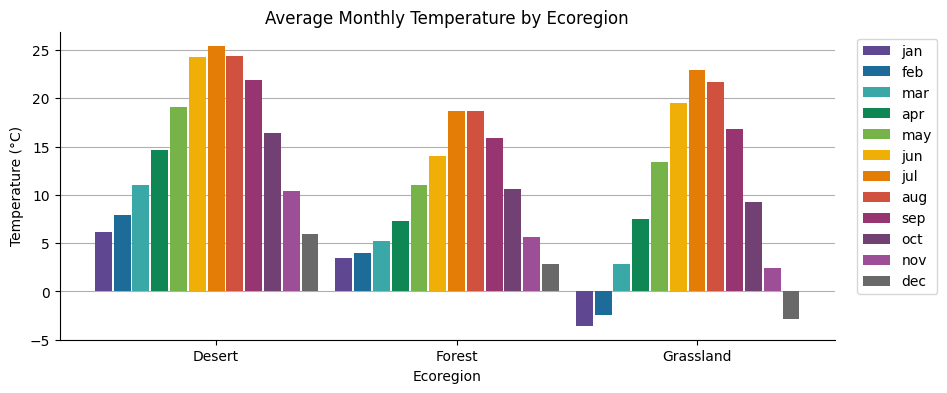

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))

normClim.geetools.plot_by_regions(
    type = "bar",
    regions = ecoregions,
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ["01_tmean", "02_tmean", "03_tmean", "04_tmean", "05_tmean", "06_tmean", "07_tmean", "08_tmean", "09_tmean", "10_tmean", "11_tmean", "12_tmean"],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Temperature by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Temperature (°C)")
plt.show()

## Bar chart 

The previous column chart can be swiped from vertical column to horizontal bars a bar chart by changing the `type` input from 'bar' to 'barh'.

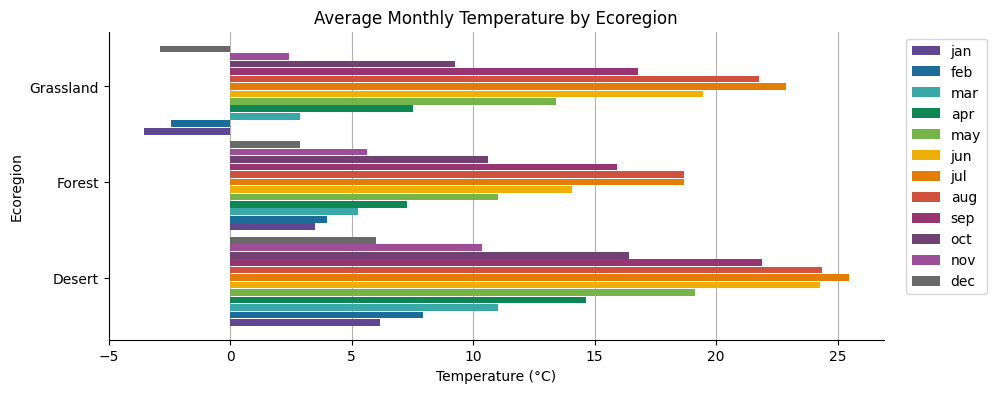

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

fc = normClim.geetools.plot_by_regions(
    type = "barh",
    regions = ecoregions,
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ["01_tmean", "02_tmean", "03_tmean", "04_tmean", "05_tmean", "06_tmean", "07_tmean", "08_tmean", "09_tmean", "10_tmean", "11_tmean", "12_tmean"],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Temperature by Ecoregion")
ax.set_ylabel("Ecoregion")
ax.set_xlabel("Temperature (°C)")
plt.show()

### Stacked bar chart 

An absolute stacked bar chart relates the total of a numeric variable by increments of a contributing categorical variable series. For instance, in this example, total precipitation is plotted as the accumulation of monthly precipitation over a year, by ecoregion. Monthly precipitation totals are derived from image bands, where each band represents a grid of average total precipitation for a given month, reduced to the mean of the pixels intersecting each of three ecoregions.

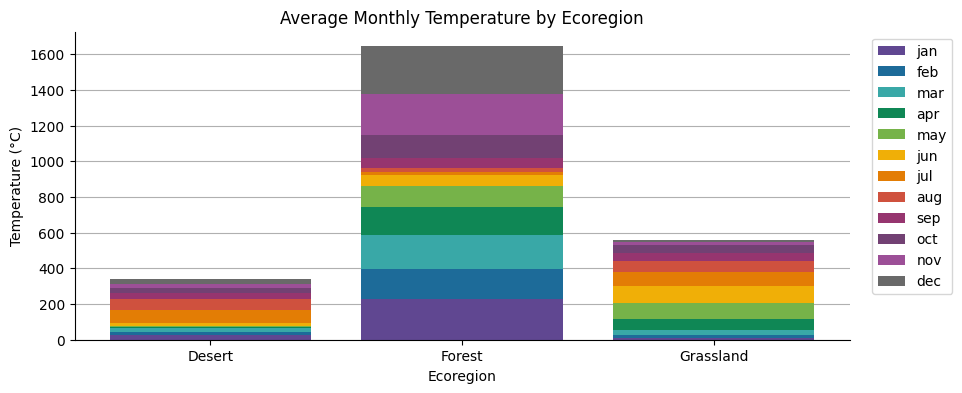

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))

fc = normClim.geetools.plot_by_regions(
    type = "stacked",
    regions = ecoregions,
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Temperature by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Temperature (°C)")
plt.show()

## Plot by bands

Bands are plotted along the x-axis. Series are labeled by values of a feature property. Reduction of the region defined by the geometry of respective series features are plotted along the y-axis.

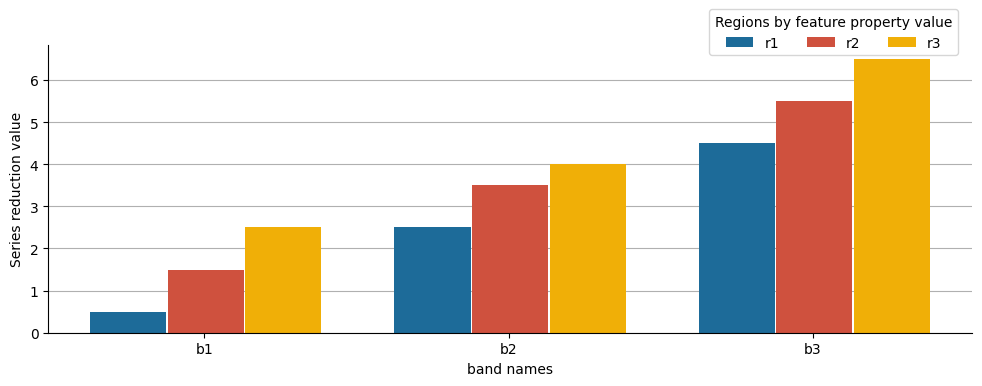

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
features = ['b1', 'b2', 'b3']
p1_values = [0.5, 2.5, 4.5]
p2_values = [1.5, 3.5, 5.5]
p3_values = [2.5, 4.0, 6.5]

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(features))
offset = 0.005

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the bars
rects1 = ax.bar(index, p1_values, bar_width, label='r1', color='#1d6b99')
rects2 = ax.bar(index + (bar_width + offset), p2_values, bar_width, label='r2', color='#cf513e')
rects3 = ax.bar(index + 2 * (bar_width + offset), p3_values, bar_width, label='r3', color='#f0af07')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('band names')
ax.set_ylabel('Series reduction value')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(features)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Regions by feature property value')

# set the grid display
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

### Colmun chart 

This chart shows total average precipitation per month for three ecoregions. The results are derived from the region reduction of an image where each band is a grid of average total precipitation for a given month. Bands are plotted along the x-axis and regions define the series.

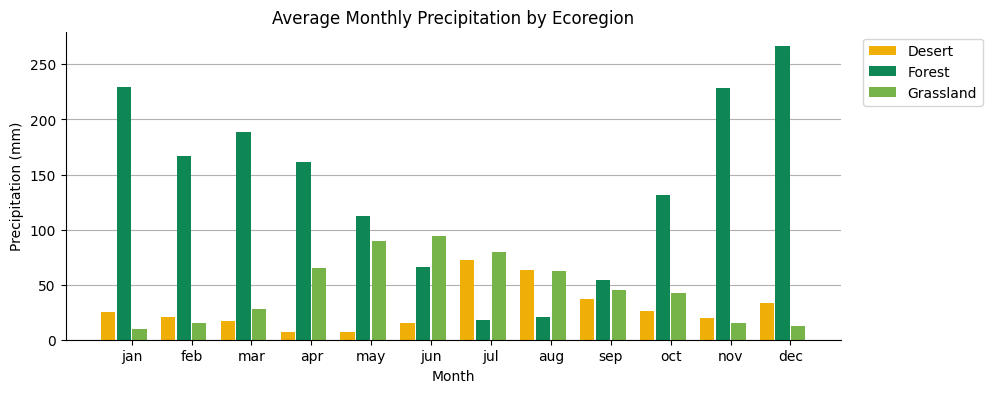

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))

fc = normClim.geetools.plot_by_bands(
    type = "bar",
    regions = ecoregions,
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Line chart 

The previous column chart can be rendered as a line chart by changing the `type` input from "bar" to "plot".

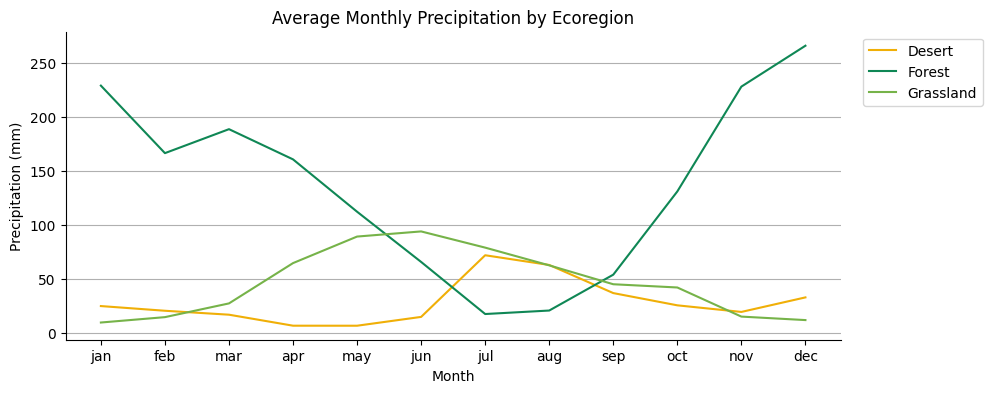

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))

fc = normClim.geetools.plot_by_bands(
    type = "plot",
    regions = ecoregions,
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Area chart 

The previous column chart can be rendered as a line chart by changing the `type` input from "plot" to "fill_between".

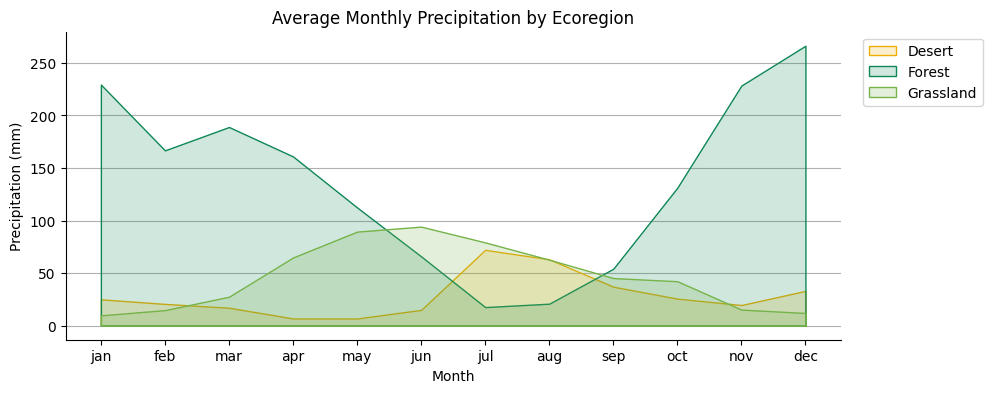

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))

fc = normClim.geetools.plot_by_bands(
    type = "fill_between",
    regions = ecoregions,
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Pie chart 

Average monthly precipitation is displayed as a proportion of the average total annual precipitation for a forest ecoregion. Image bands representing monthly precipitation are subset from a climate normals dataset and reduced to the mean of pixels intersecting the ecoregion.

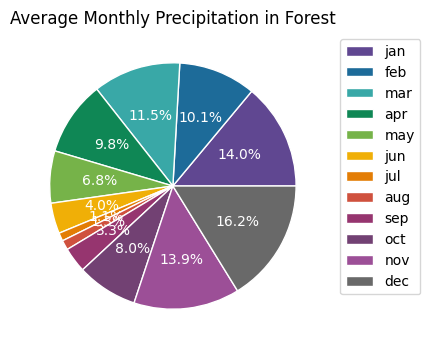

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))

normClim.geetools.plot_by_bands(
    type = "pie",
    regions = ecoregions.filter(ee.Filter.eq("label", "Forest")),
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation in Forest")
plt.show()

### Donuts chart 

The previous chart can be represented as a donut by replacing the `type` parameter with `donut`.

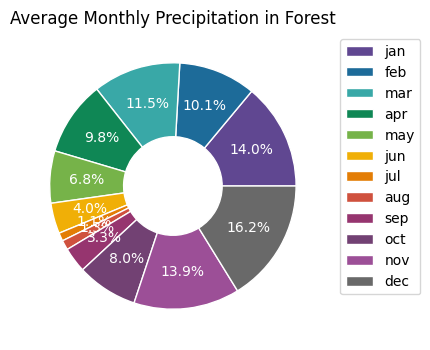

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

fc = normClim.geetools.plot_by_bands(
    type = "donut",
    regions = ecoregions.filter(ee.Filter.eq("label", "Forest")),
    reducer = ee.Reducer.mean(),
    scale = 500,
    regionId = "label",
    bands = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation in Forest")
plt.show()

## histogram plot 

A histogram of pixel values within a region surrounding Salt Lake City, Utah, USA are displayed for three MODIS surface reflectance bands. The histogram is plotted as a line chart, where x-axis values are pixel values and y-axis values are the frequency of pixels with the respective value.

In [16]:
# custom image for this specific chart
modisSr = (
    ee.ImageCollection("MODIS/061/MOD09A1")
    .filter(ee.Filter.date("2018-06-01", "2018-09-01"))
    .select(["sur_refl_b01", "sur_refl_b02", "sur_refl_b06"])
    .mean()
)
histRegion = ee.Geometry.Rectangle([-112.60, 40.60, -111.18, 41.22])

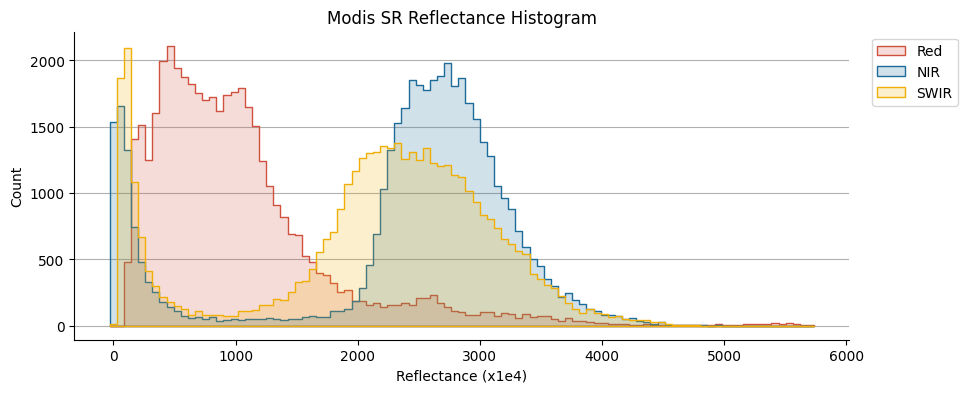

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize the plot with the ecoregions data
modisSr.geetools.plot_hist(
    bands = ["sur_refl_b01", "sur_refl_b02", "sur_refl_b06"],
    labels = [['Red', 'NIR', 'SWIR']],
    colors = ["#cf513e", "#1d6b99", "#f0af07"],
    ax = ax,
    bins = 100,
    scale = 500,
    region = histRegion,
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Modis SR Reflectance Histogram")
ax.set_xlabel("Reflectance (x1e4)")
plt.show()